# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Akhmad Mustolih
- **Email:**
 mc229d5y0444@student.devacademy.id
- **ID Dicoding:** MC229D5Y0444

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren umum penyewaan sepeda perbulannya?
2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?
3. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?Atribut apa yang paling mempengaruhi jumlah penyewaan (cnt) ? Bagaimana atribut tersebut mempengaruhi jumlah cnt?

## Import Semua Packages/Library yang Digunakan


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [91]:
main_data = pd.read_csv("https://raw.githubusercontent.com/ryu45-hu/submission/refs/heads/main/data/hour.csv")
display(main_data.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Data yang ditampilkan cuma 5 baris pertama sesuai gambar diatas. data diatas adalah  dataset yang akan digunakan untuk menilai kualitas datanya.Tabel diatas berisi data berikut :

- hour.csv: Data penyewaan sepeda per jam (17.379 data).
- data terdiri dari beberapa atribut yaitu season(musim),	yr(tahun),	mnth(bulan),	hr(jam),	holiday(hari libur/Cuti),	weekday(Akhir Minggu), 	workingday(hari kerja),	weathersit(cuaca),	temp(temperatur),	atemp(suhu),	hum(kelembapan),	windspeed(kecepatan angin), 	casual(jumlah pengguna kasual),	registered(jumlah pengguna pendaftar),	cnt(total jumlah pengguna kasual dan pendaftar)


### Assessing Data

In [92]:
print("\main_data info:")
main_data.info()
print("\nmain_data numerical summary statistics:\n", main_data.describe())


\main_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

main_data numerical summary sta

**Insight:**
- `dteday      17379 non-null  object` type data salah,
 Dataset `main_data` tidak memiliki nilai yang hilang, sehingga datanya lengkap. Namun, terdapat kesalahan dalam tipe data pada kolom `dteday `. Pada kolom ini seharusnya memiliki tipe data `datetime`, bukan `object`, yang biasanya digunakan untuk data berbentuk string.

### Cleaning Data

In [93]:
main_data['dteday'] = pd.to_datetime(main_data['dteday'])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan hasil proses assessing data, diketahui bahwa terdapat satu masalah yang dijumpai dalam `main_data `, yaitu kesalahan tipe data saja. Jadi pada tahap ini, masalah pada tahap assessing telah selesai.

## Exploratory Data Analysis (EDA)

In [94]:
#Cek data
print("\nmain_data info:")
main_data.info()


# Nilai Unik (Kolom Kategoris) - Contoh untuk beberapa kolom
categorical_cols_main_data = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols_main_data:
    print(f"\nUnique values in main_data for {col}:\n{main_data[col].value_counts()}")


main_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt  

*Explore Tren dan Korelasi*

In [95]:
#rata-rata sewa sepeda di setiap bulannya
monthly_average_count = main_data.groupby(main_data['dteday'].dt.to_period("M"))['cnt'].mean().reset_index()
monthly_average_count.head()

,dteday,cnt
0,2011-01,55.507267
1,2011-02,74.291217
2,2011-03,87.732877
3,2011-04,131.947149
4,2011-05,182.555108


In [96]:
#Mengubah "dteday" dari period menjadi datetime
monthly_average_count["dteday"] = pd.to_datetime(monthly_average_count["dteday"].dt.to_timestamp())

In [97]:
# Menggabungkan data faktorpenyewaan sepeda
factor_df = main_data[["cnt","season", "holiday","weekday"	,"workingday", "weathersit",	"temp", "atemp",	"hum", "windspeed"]].copy()
factor_df.head()

,cnt,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,16,1,0,6,0,1,0.24,0.2879,0.81,0.0
1,40,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,32,1,0,6,0,1,0.22,0.2727,0.80,0.0
3,13,1,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,1,0,6,0,1,0.24,0.2879,0.75,0.0


In [98]:
# Korelasi antara faktor
factor_df.corr()

,cnt,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
cnt,1.000000,0.178056,-0.030927,0.026900,0.030284,-0.142426,0.404772,0.400929,-0.322911,0.093234
season,0.178056,1.000000,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773
holiday,-0.030927,-0.009585,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988
weekday,0.026900,-0.002335,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.030284,0.013743,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830
weathersit,-0.142426,-0.014524,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226
temp,0.404772,0.312025,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125
atemp,0.400929,0.319380,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336
hum,-0.322911,0.150625,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105
windspeed,0.093234,-0.149773,0.003988,0.011502,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000


In [99]:
# Merata-ratakan temp di setiap bulannya
monthly_average_temp = main_data.groupby(main_data["dteday"].dt.to_period("M"))["temp"].mean().reset_index()
monthly_average_temp.head()

,dteday,temp
0,2011-01,0.197413
1,2011-02,0.283975
2,2011-03,0.331233
3,2011-04,0.471015
4,2011-05,0.577231


In [100]:
# Mengubah "dteday" dari period menjadi datetime
monthly_average_temp["dteday"] = pd.to_datetime(monthly_average_temp["dteday"].dt.to_timestamp())


In [101]:
# Menggabungkan monthly average TEMP dan O3
monthly_average_count_temp = monthly_average_count.merge(monthly_average_temp, on= "dteday", how= "left")
monthly_average_count_temp.head()


,dteday,cnt,temp
0,2011-01-01,55.507267,0.197413
1,2011-02-01,74.291217,0.283975
2,2011-03-01,87.732877,0.331233
3,2011-04-01,131.947149,0.471015
4,2011-05-01,182.555108,0.577231



**Insight:**

- Terlihat bahwa jumlah penyewaan sepeda  berkorelasi dengan temp dengan nilai korelasi bernilai 0.404772.
- Dikarenakan count dan temp berkorelasi baik, korelasi ini memperlihatkan juga bahwa semakin besar cnt semakin besar temp-nya demikian pula untuk sebaliknya.

## Visualization & Explanatory Analysis

### 1. Bagaimana tren umum penyewaan sepeda perbulannya?




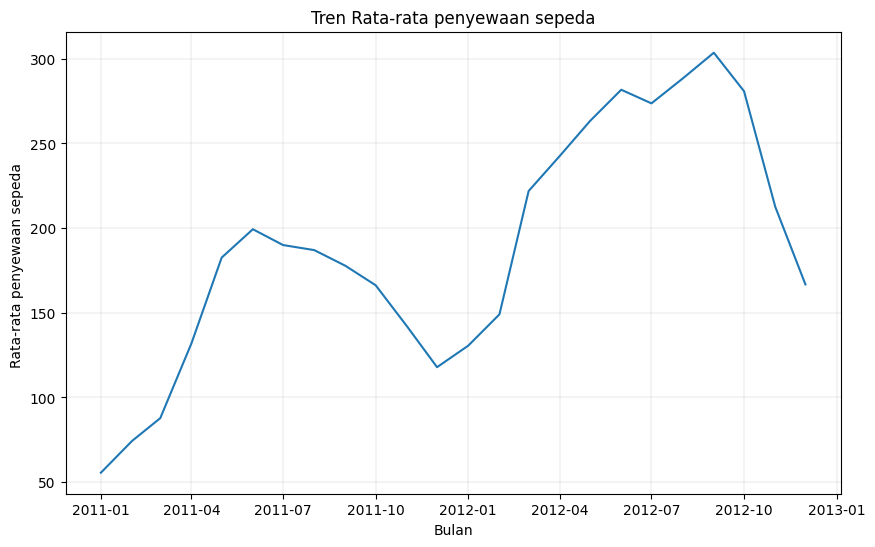

In [102]:
# Visualisasi tren cnt perbulannya
plt.figure(figsize=(10,6))
sns.lineplot(data= monthly_average_count,
             x= "dteday",
             y= "cnt",
             linestyle= "-")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata penyewaan sepeda ")
plt.title("Tren Rata-rata penyewaan sepeda")
plt.grid(linewidth = 0.2)
plt.show()

**Insight:**
- Tren rental sepeda pada waktu ke waktu mengalami peingkatan. Pada pertengahan tahun 2011 dan pertengahan tahun 2012 terjadi lonjakan yang signifikan, akan tetapi pada setiap awal tahun mengalami penurunan. Ini dipengaruhi beberapa faktor, seperti musim, cuaca, dan waktu kerja juga.

### 2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?

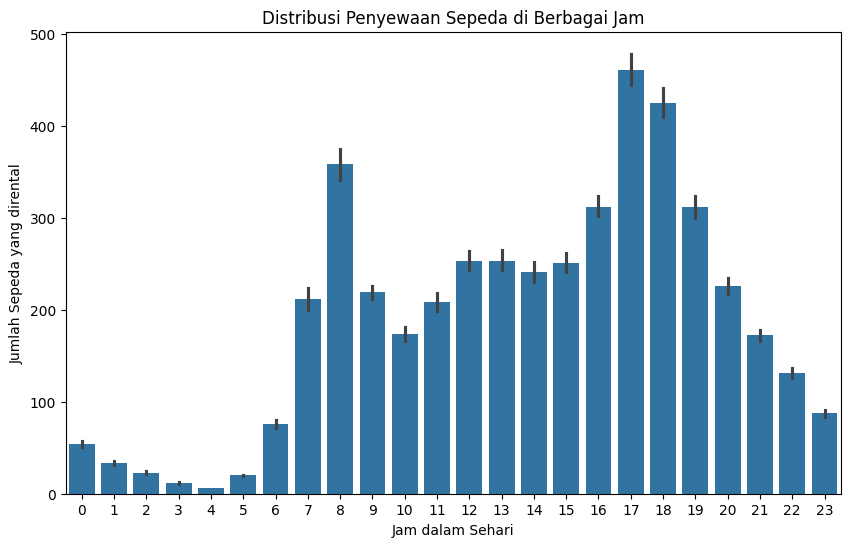

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=main_data)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Sepeda yang dirental')
plt.title('Distribusi Penyewaan Sepeda di Berbagai Jam')
plt.show()

**Insight:**
- Berdasarkan grafik diatas, penyewaan sepeda dalam sehari meningkat pada jam-jam tertentu di pagi hari sekitar jam 7 - 9 pagi, pengguna sepeda sampai 400, dan melonjak sampai hampir 500 di waktu sore hari jam 17.00. Ini membuktikan penyewa sepeda sering merental di pagi dan sore hari.

### 3. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda? Atribut apa yang paling mempengaruhi jumlah penyewaan (cnt) ? Bagaimana atribut tersebut mempengaruhi jumlah cnt?

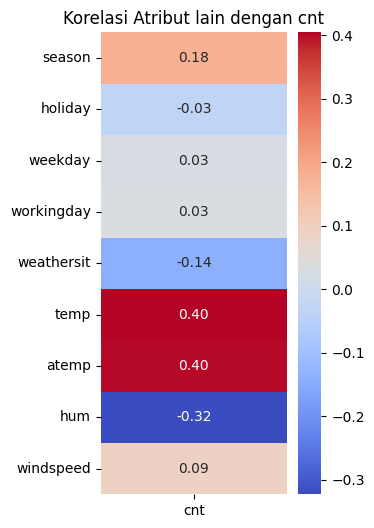

In [104]:
# Korelasi antara cnt dengan atribut lain
correlation_matriks = factor_df.corr()[["cnt"]].drop("cnt")
plt.figure(figsize=(3, 6))
sns.heatmap(correlation_matriks, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Atribut lain dengan cnt")
plt.show()


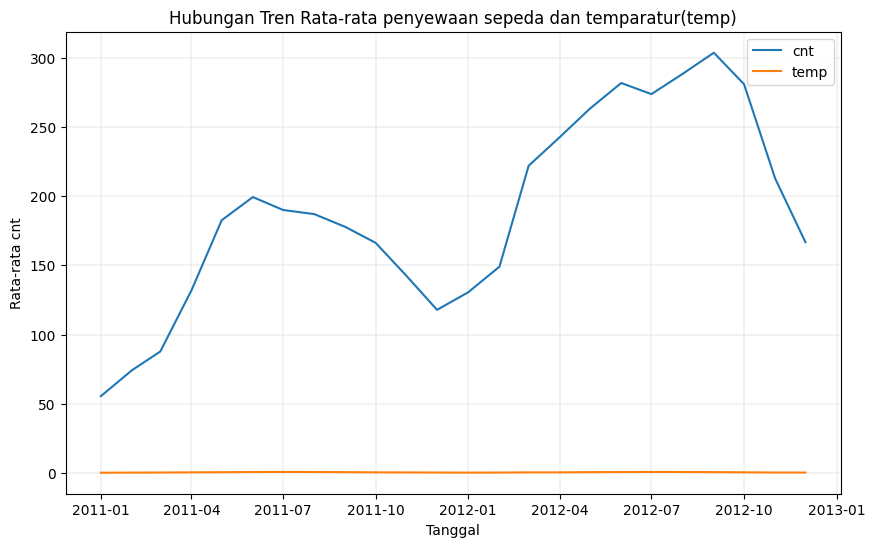

In [105]:
# Hubungan antara cnt dan temp
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_average_count_temp,
             x="dteday",
             y="cnt",
             label="cnt")
sns.lineplot(data=monthly_average_count_temp,
             x="dteday",
             y="temp",
             label="temp")
plt.title("Hubungan Tren Rata-rata penyewaan sepeda dan temparatur(temp)")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata cnt")
plt.legend()
plt.grid(linewidth = 0.2)
plt.show()

**Insight:**
- Terlihat pada line chart pada pertanyaan 1 bahwasannya tren penyewaan sepeda berupa musiman. Karena linenya berlika-liku atau naik dan turun.
- Terlihat pula pada bagian heatmap TEMP adalah atribut yang sangat memengaruhi jumlah penyewa. Bisa dilihat pula pada linechart antara tren rata-rata penyewa sepeda (cnt) dan temp kurang terlihat karena perbedaan nilai label y, yang membuat variabel temp terlihat datar. Akan tetapi pada data sebelumnya sudah terlihat bahwa temp menjadi atribut/ faktor yang paling berpengaruh dalam peningkatan jumlah penyewa sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion
1. Bagaimana tren umum penyewaan sepeda perbulannya?
   - Kesipulan:
   - Tren rental sepeda pada waktu ke waktu mengalami peingkatan. Pada pertengahan tahun 2011 dan pertengahan tahun 2012 terjadi lonjakan yang signifikan, akan tetapi pada setiap awal tahun mengalami penurunan. Ini dipengaruhi beberapa faktor yang terjadi setiap ahunnya.

2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?
   - Kesimpulan:
   - Berdasarkan grafik, penyewaan sepeda dalam sehari meningkat pada jam-jam tertentu di pagi hari sekitar jam 7 - 9 pagi, pengguna sepeda sampai 400, dan melonjak sampai hampir 500 di waktu sore hari jam 17.00. Ini membuktikan penyewa sepeda sering merental di pagi dan sore hari.
   
3. Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda? Atribut apa yang paling mempengaruhi jumlah penyewaan (cnt) ? Bagaimana atribut tersebut mempengaruhi jumlah cnt?
  - Kesimpulan
  - Faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah faktor cuaca lebih tepatnya pada Temperatur (temp) yang menghasilkan nilai korelasi bernilai 0.404 yang dapat diartikan bahwasannya korelasi antara keduanya bernilai rendah tapi masih ada hubungannya. Berdasarkan data semakin tinggi temp jga meningkatnya jumlah penyewa sepeda, dan sebaliknya.





In [106]:
main_data.to_csv("main_data.csv", index=False)